In [1]:
# import des modules nécessaires
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import matplotlib.patches as mpatches
from distinctipy import distinctipy
from matplotlib.font_manager import FontProperties
from matplotlib import rc
import numpy as np
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import ipywidgets as widgets
from IPython.display import clear_output, display
from scipy.stats import chi2_contingency as chi2_contingency
import statsmodels.formula.api as statsapi
import statsmodels as stats
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
import xlrd as xlrd
from matplotlib import font_manager # for mac users
import platform
import os
from sklearn.decomposition import PCA

# Modifier les paramètres d'affichage de la sortie des commandes dans Jupyter
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 50)
pd.set_option('display.width', 100)

# Pour lister les polices présentes
#fpaths = matplotlib.font_manager.findSystemFonts()
#for i in fpaths:
#    f = matplotlib.font_manager.get_font(i)
#    print(f.family_name)
# import de la police Garamond

system = platform.system()

if system == 'Darwin':  # macOS
  font_path = '/Library/Fonts/GaramondPremrPro.otf'
elif system == 'Windows':
  font_path = 'C:/Windows/Fonts/GARA.TTF'
else:  #  unix
  font_path = 'GARA.TTF'
print(font_path)

garamond_font = FontProperties(fname="/Library/Fonts/GaramondPremrPro.otf",size=14)
#    timesnewroman_font = FontProperties(fname="C:/Windows/Fonts/TIMES.TTF",size=14)

font_manager.findSystemFonts(fontpaths=font_path, fontext="ttf")
font_manager.findfont("Garamond Premier Pro") 

# Définissez la police par défaut pour toute la figure
matplotlib.rcParams['font.family'] = 'Garamond Premier Pro'

/Library/Fonts/GaramondPremrPro.otf


In [4]:
# Chargement des données PINGOUIN
df_pingouin = pd.read_table("input/mlsupervise/penguins_size.csv",sep=",")

# Ajout titre colonnes
df_pingouin.columns=["species","island","culmen_length_mm","culmen_depth_mm","flipper_length_mm","body_mass_g","sex"]

# Verif données
print(df_pingouin.head(5))
print("Shape des données PINGOUIN: ", df_pingouin.shape)

  species     island  culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g     sex
0  Adelie  Torgersen              39.1             18.7              181.0       3750.0    MALE
1  Adelie  Torgersen              39.5             17.4              186.0       3800.0  FEMALE
2  Adelie  Torgersen              40.3             18.0              195.0       3250.0  FEMALE
3  Adelie  Torgersen               NaN              NaN                NaN          NaN     NaN
4  Adelie  Torgersen              36.7             19.3              193.0       3450.0  FEMALE
Shape des données PINGOUIN:  (344, 7)


In [2]:
# Projet 1. Q1. 

# import des librairies

from sklearn.tree import plot_tree
from sklearn.tree import tree

# Définition des tableaux de données X et Y

# Entrainement d'un arbre de profondeur 1
clf = tree.DecisionTreeClassifier()
clf = clf.fit(mes données)


# Affichage de l'Arbre
fig = plt.figure()
plot_tree(clf,filled=True)
plt.title("title")
plt.show()

ImportError: cannot import name 'tree' from 'sklearn.tree' (/Users/delphine/Applications/anaconda3/lib/python3.10/site-packages/sklearn/tree/__init__.py)

/var/folders/8g/9w5gh8y54xd9jss52_tlythr0000gn/T/ipykernel_790/4294555407.py:10: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  temp = df_iris.sub(df_iris.mean()) # Soustraire la moyenne de chaque colonne à chaque valeur : centrer les valeurs


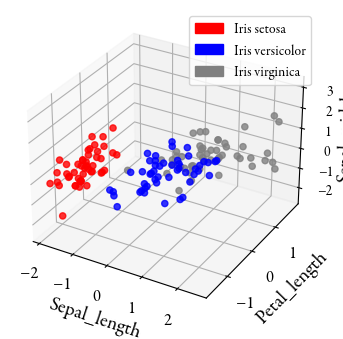

In [4]:
# Projet 1. Q2. 

# Centrer et reduire les données

# Première méthode avec scale
from sklearn.preprocessing import scale
#df_iris_cr = scale(df_iris)

# Seconde méthode pour obtenir directement un dataframe
temp = df_iris.sub(df_iris.mean()) # Soustraire la moyenne de chaque colonne à chaque valeur : centrer les valeurs
df_iris_cr= temp.div(temp.std()) # Divisé les valeurs de la dataframe par l'écart-type de chaque colonne
df_iris_cr["iris_class"]=df_iris["iris_class"]
fig = plt.figure(figsize=(5,4))
ax = fig.add_subplot(projection='3d')
x=df_iris_cr["sepal_length_cm"]
y=df_iris_cr["petal_length_cm"]
z=df_iris_cr["sepal_width_cm"]
colors={"Iris-setosa":"red","Iris-versicolor":"blue","Iris-virginica":"grey"}

red_patch = mpatches.Patch(color='red', label='Iris setosa')
blue_patch = mpatches.Patch(color='blue', label='Iris versicolor')
grey_patch = mpatches.Patch(color='grey', label='Iris virginica')
ax.legend(handles=[red_patch,blue_patch,grey_patch])

sctt=ax.scatter3D(x,y,z,alpha=0.8, c=df_iris_cr["iris_class"].map(colors))
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel("Sepal_length", fontsize=14)
plt.ylabel("Petal_length", fontsize=14)
ax.set_zlabel("Sepal_width", fontsize=14)
ax.zaxis.labelpad=-0.7
plt.show()